In [2]:
!pip install ucimlrepo


First 5 Rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int

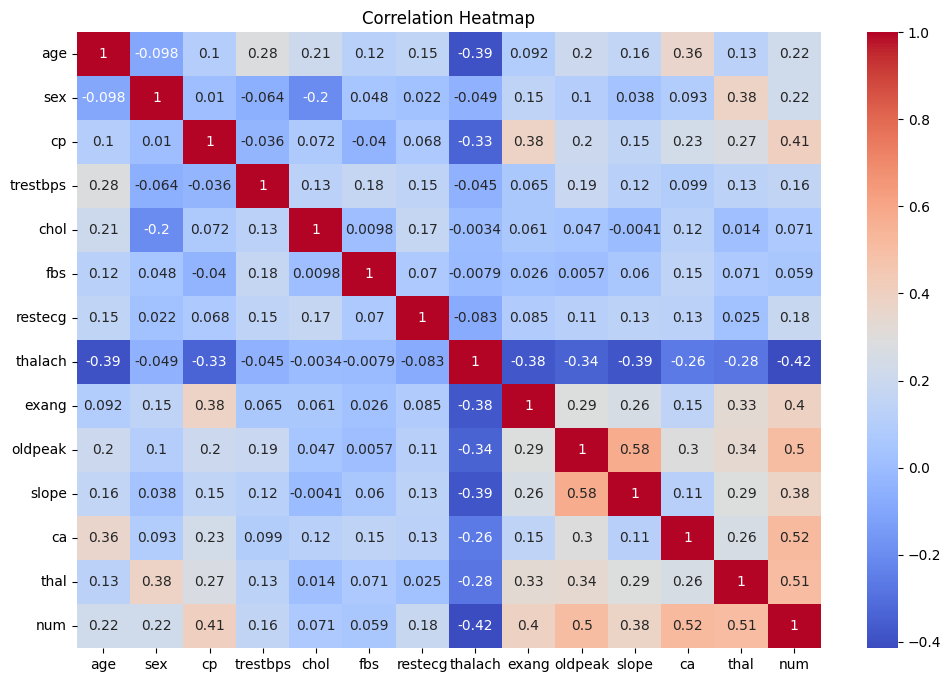

ValueError: Could not interpret value `target` for `x`. An entry with this name does not appear in `data`.

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Fetch Dataset from ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch Heart Disease dataset (ID: 45)
heart_disease = fetch_ucirepo(id=45)

# Combine features and targets into a single DataFrame
df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)

# Step 3: Initial Inspection
print("First 5 Rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nShape:", df.shape)
print("\nStatistical Summary:\n", df.describe())

# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.countplot(data=df, x='target')
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Step 5: Preprocessing
# Define Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Model 1 – Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Step 7: Model 2 – Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Optional: View Metadata and Variable Info
print("\nMetadata:\n", heart_disease.metadata)
print("\nVariables:\n", heart_disease.variables)


First 5 Rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64

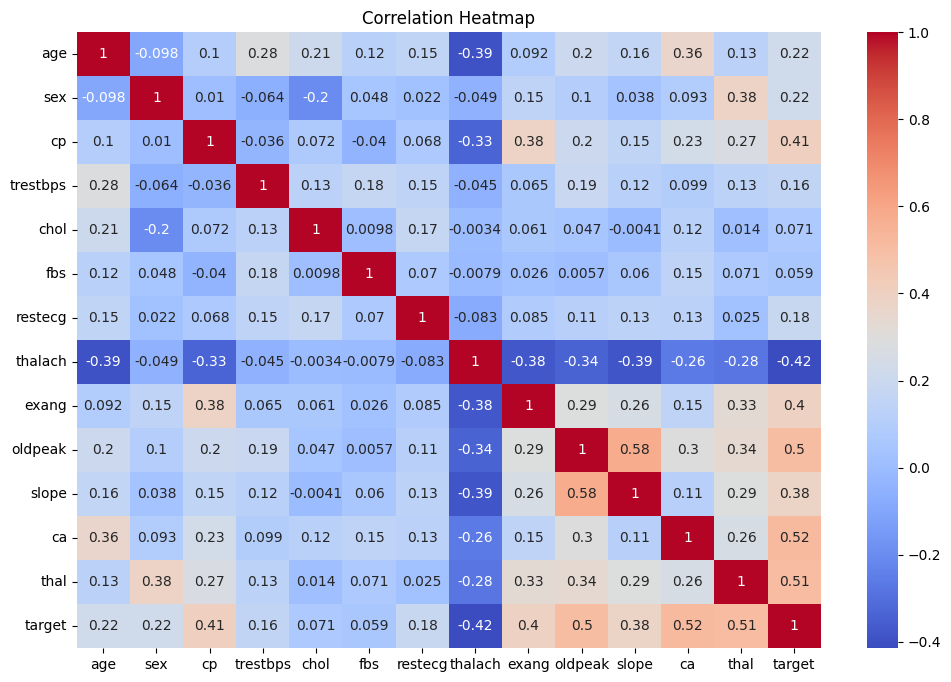

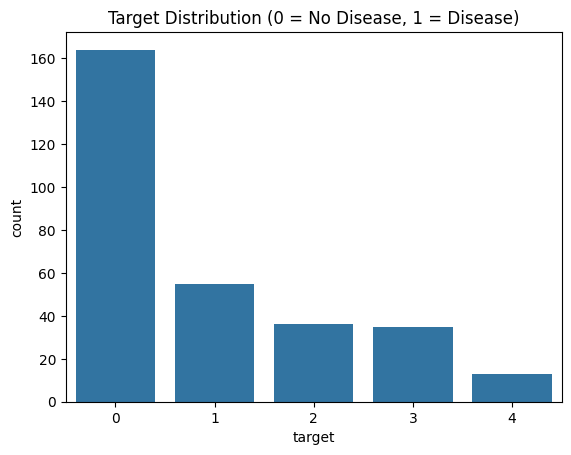

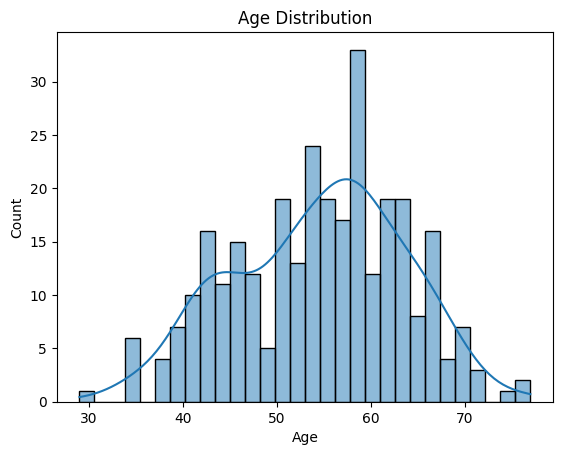


Logistic Regression Results
Accuracy: 0.5409836065573771
Confusion Matrix:
 [[26  1  2  0  0]
 [ 3  3  3  3  0]
 [ 2  1  2  4  0]
 [ 1  2  2  2  0]
 [ 0  1  0  3  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Results
Accuracy: 0.4918032786885246
Confusion Matrix:
 [[28  0  1  0  0]
 [ 6  1  3  2  0]
 [ 4  2  1  2  0]
 [ 1  6  0  0  0]
 [ 0  2  1  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.09      0.08      0.09        12
           2       0.17      0.11      0.13         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.20      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61


Metadata:
 {'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Class

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Importing SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer

# Step 2: Fetch Dataset from ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch Heart Disease dataset (ID: 45)
heart_disease = fetch_ucirepo(id=45)

# Combine features and targets into a single DataFrame
df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)
# Rename the 'num' column to 'target'
df = df.rename(columns={'num': 'target'}) # Renaming the target column to 'target'

# Step 3: Initial Inspection
print("First 5 Rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nShape:", df.shape)
print("\nStatistical Summary:\n", df.describe())

# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.countplot(data=df, x='target') # Using 'target' for countplot
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Step 5: Preprocessing
# Define Features and Target
X = df.drop('target', axis=1) # Dropping the 'target' column
y = df['target'] # Accessing the 'target' column

# Impute missing values using the mean
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
X = imputer.fit_transform(X)

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Model 1 – Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Step 7: Model 2 – Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Optional: View Metadata and Variable Info
print("\nMetadata:\n", heart_disease.metadata)
print("\nVariables:\n", heart_disease.variables)

In [8]:
# Step 1: Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 2: Load Data
heart_disease = fetch_ucirepo(id=45)
df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)

# Step 3: Convert Multiclass to Binary (0 = No disease, 1 = Disease)
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

# Step 4: EDA (Optional – You can visualize again)
sns.countplot(data=df, x='target')
plt.title("Target Distribution (Binary)")
plt.show()

# Step 5: Split Data
X = df.drop('target', axis=1)
y = df['target']

# Step 6: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Balance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Step 9: Logistic Regression
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Step 10: Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🔸 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


KeyError: 'target'

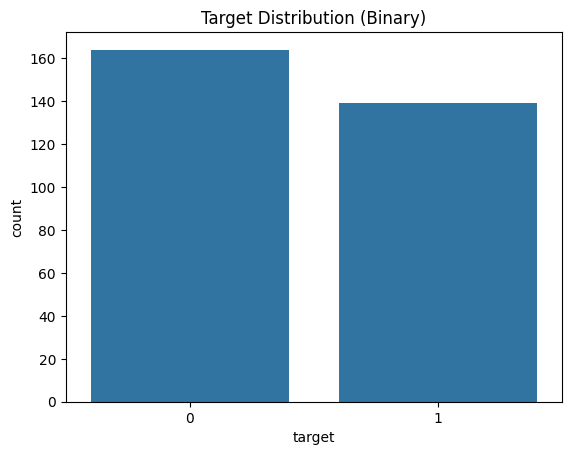

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [9]:
# Step 1: Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 2: Load Data
heart_disease = fetch_ucirepo(id=45)
df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)

# Step 3: Convert Multiclass to Binary (0 = No disease, 1 = Disease)
# Rename 'num' to 'target' first
df = df.rename(columns={'num': 'target'})
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1) # Now apply the function

# Step 4: EDA (Optional – You can visualize again)
sns.countplot(data=df, x='target')
plt.title("Target Distribution (Binary)")
plt.show()

# ... (rest of your code remains the same)
# Step 5: Split Data
X = df.drop('target', axis=1)
y = df['target']

# Step 6: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Balance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Step 9: Logistic Regression
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Step 10: Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🔸 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

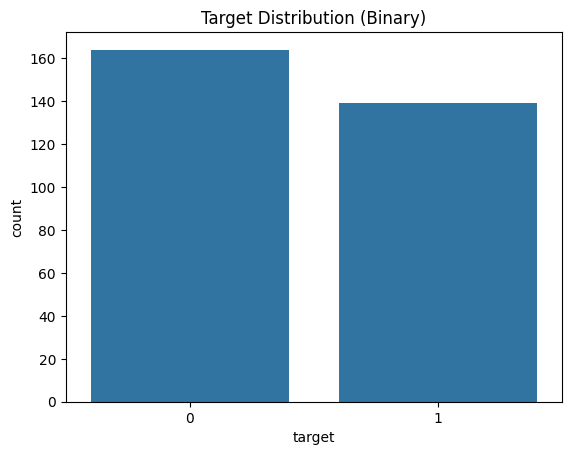


🔹 Logistic Regression Results
Accuracy: 0.8333333333333334
Confusion Matrix:
 [[26  7]
 [ 4 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.81      0.88      0.84        33

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66


🔸 Random Forest Results
Accuracy: 0.8787878787878788
Confusion Matrix:
 [[28  5]
 [ 3 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.86      0.91      0.88        33

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



In [10]:
# Step 1: Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Step 2: Load Data
heart_disease = fetch_ucirepo(id=45)
df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)

# Step 3: Convert Multiclass to Binary (0 = No disease, 1 = Disease)
# Rename 'num' to 'target' first
df = df.rename(columns={'num': 'target'})
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1) # Now apply the function

# Step 4: EDA (Optional – You can visualize again)
sns.countplot(data=df, x='target')
plt.title("Target Distribution (Binary)")
plt.show()

# Step 5: Split Data
X = df.drop('target', axis=1)
y = df['target']

# Step 6: Impute missing values before scaling
# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # or strategy='median', etc.
# Fit and transform the imputer on your data
X = imputer.fit_transform(X)

# Step 7: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Balance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Step 10: Logistic Regression
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Step 11: Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🔸 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))